In [ ]:
#1A: show statistics(mean,std,...) for each feature using groupby, make barplots to show distribution
#1B: 1.impute missing values using mean value 2.impute missing values as 0
#1C: re-format the data into patient, time, mood, activity, call..., aggregate by 5-day windows to generate instances for training

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
rawdata=pd.read_csv("dataset_mood_smartphone.csv")

In [3]:
rawdata

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [4]:
rawdata=rawdata.drop('Unnamed: 0',axis=1)

In [48]:
rawdata['time']=pd.to_datetime(rawdata['time'])

In [5]:
rawdata.groupby('variable')['value'].mean()

variable
activity                  0.115958
appCat.builtin           18.538262
appCat.communication     43.343792
appCat.entertainment     37.576480
appCat.finance           21.755251
appCat.game             128.391615
appCat.office            22.578892
appCat.other             25.810839
appCat.social            72.401906
appCat.travel            45.730850
appCat.unknown           45.553006
appCat.utilities         18.537552
appCat.weather           20.148714
call                      1.000000
circumplex.arousal       -0.098624
circumplex.valence        0.687808
mood                      6.992555
screen                   75.335206
sms                       1.000000
Name: value, dtype: float64

In [6]:
rawdata.groupby('variable')['value'].max()

variable
activity                    1.000
appCat.builtin          33960.246
appCat.communication     9830.777
appCat.entertainment    32148.677
appCat.finance            355.513
appCat.game              5491.793
appCat.office           32708.818
appCat.other             3892.038
appCat.social           30000.906
appCat.travel           10452.615
appCat.unknown           2239.937
appCat.utilities         1802.649
appCat.weather            344.863
call                        1.000
circumplex.arousal          2.000
circumplex.valence          2.000
mood                       10.000
screen                   9867.007
sms                         1.000
Name: value, dtype: float64

In [49]:
rawdata.groupby('variable')['value'].min()

variable
activity                    0.000
appCat.builtin         -82798.871
appCat.communication        0.006
appCat.entertainment       -0.011
appCat.finance              0.131
appCat.game                 1.003
appCat.office               0.003
appCat.other                0.014
appCat.social               0.094
appCat.travel               0.080
appCat.unknown              0.111
appCat.utilities            0.246
appCat.weather              1.003
call                        1.000
circumplex.arousal         -2.000
circumplex.valence         -2.000
mood                        1.000
screen                      0.035
sms                         1.000
Name: value, dtype: float64

In [50]:
rawdata['variable'].unique()

array(['mood', 'circumplex.arousal', 'circumplex.valence', 'activity',
       'screen', 'call', 'sms', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather'],
      dtype=object)

variable
activity                Axes(0.125,0.11;0.775x0.77)
appCat.builtin          Axes(0.125,0.11;0.775x0.77)
appCat.communication    Axes(0.125,0.11;0.775x0.77)
appCat.entertainment    Axes(0.125,0.11;0.775x0.77)
appCat.finance          Axes(0.125,0.11;0.775x0.77)
appCat.game             Axes(0.125,0.11;0.775x0.77)
appCat.office           Axes(0.125,0.11;0.775x0.77)
appCat.other            Axes(0.125,0.11;0.775x0.77)
appCat.social           Axes(0.125,0.11;0.775x0.77)
appCat.travel           Axes(0.125,0.11;0.775x0.77)
appCat.unknown          Axes(0.125,0.11;0.775x0.77)
appCat.utilities        Axes(0.125,0.11;0.775x0.77)
appCat.weather          Axes(0.125,0.11;0.775x0.77)
call                    Axes(0.125,0.11;0.775x0.77)
circumplex.arousal      Axes(0.125,0.11;0.775x0.77)
circumplex.valence      Axes(0.125,0.11;0.775x0.77)
mood                    Axes(0.125,0.11;0.775x0.77)
screen                  Axes(0.125,0.11;0.775x0.77)
sms                     Axes(0.125,0.11;0.775x0.77)
Nam

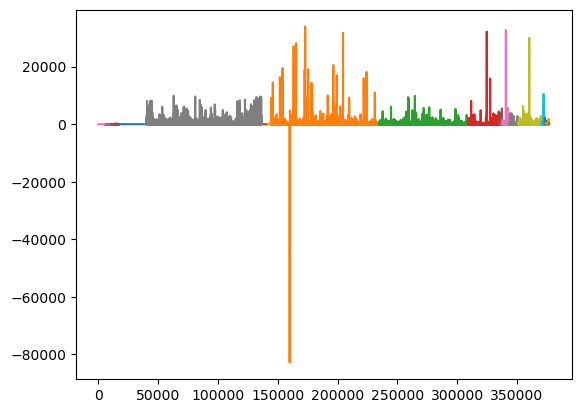

In [51]:
rawdata.groupby('variable')['value'].plot()

In [66]:
rawdata

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [73]:
rawdata.loc[((rawdata['variable']=='appCat.builtin')&(rawdata['value']<0))|((rawdata['variable']=='appCat.builtin')&(rawdata['value']>20000))]

,id,time,variable,value
150040,AS14.02,2014-03-16 15:46:43.769,appCat.builtin,-44.689
159972,AS14.07,2014-04-30 14:18:06.200,appCat.builtin,-82798.871
162154,AS14.12,2014-04-02 16:42:16.523,appCat.builtin,-1.218
163298,AS14.12,2014-04-09 02:42:21.210,appCat.builtin,27160.374
165330,AS14.12,2014-04-19 02:10:37.487,appCat.builtin,28163.993
172955,AS14.14,2014-04-08 23:34:57.855,appCat.builtin,33960.246
196457,AS14.26,2014-04-16 23:48:21.302,appCat.builtin,20556.690
204569,AS14.27,2014-04-20 23:13:11.269,appCat.builtin,31729.818


In [76]:
rawdata=rawdata.loc[~(((rawdata['variable']=='appCat.builtin')&(rawdata['value']<0))|((rawdata['variable']=='appCat.builtin')&(rawdata['value']>20000)))]

In [78]:
rawdata=rawdata.loc[~(((rawdata['variable']=='appCat.entertainment')&(rawdata['value']<0))|((rawdata['variable']=='appCat.entertainment')&(rawdata['value']>20000)))]

In [79]:
rawdata=rawdata.loc[~(((rawdata['variable']=='appCat.office')&(rawdata['value']<0))|((rawdata['variable']=='appCat.office')&(rawdata['value']>20000)))]

In [80]:
rawdata=rawdata.loc[~(((rawdata['variable']=='appCat.social')&(rawdata['value']<0))|((rawdata['variable']=='appCat.social')&(rawdata['value']>20000)))]

In [81]:
rawdata.groupby('variable')['value'].min()

variable
activity                0.000
appCat.builtin          0.001
appCat.communication    0.006
appCat.entertainment    0.001
appCat.finance          0.131
appCat.game             1.003
appCat.office           0.003
appCat.other            0.014
appCat.social           0.094
appCat.travel           0.080
appCat.unknown          0.111
appCat.utilities        0.246
appCat.weather          1.003
call                    1.000
circumplex.arousal     -2.000
circumplex.valence     -2.000
mood                    1.000
screen                  0.035
sms                     1.000
Name: value, dtype: float64

In [83]:
rawdata[rawdata['value'].isna()].variable.value_counts()

variable
circumplex.valence    156
circumplex.arousal     46
Name: count, dtype: int64

In [90]:
valence=rawdata[rawdata['variable']=='circumplex.valence'].ffill()

In [92]:
arousal=rawdata[rawdata['variable']=='circumplex.arousal'].ffill()

In [93]:
rawdata[rawdata['variable']=='circumplex.arousal']=arousal

In [94]:
rawdata[rawdata['variable']=='circumplex.valence']=valence

In [96]:
rawdata.set_index('time',inplace=True)

In [97]:
scores=rawdata.groupby(['id','variable']).resample('D').sum()['value']

In [98]:
scores=rawdata[rawdata['variable'].isin(['circumplex.arousal','circumplex.valence','mood'])]

In [99]:
scores=scores.groupby(['id','variable']).resample('D').mean()['value']

In [100]:
scores

id       variable            time      
AS14.01  circumplex.arousal  2014-02-26   -0.25
                             2014-02-27    0.00
                             2014-02-28     NaN
                             2014-03-01     NaN
                             2014-03-02     NaN
                                           ... 
AS14.33  mood                2014-05-27    6.20
                             2014-05-28    8.20
                             2014-05-29    7.00
                             2014-05-30    6.80
                             2014-05-31    7.00
Name: value, Length: 3993, dtype: float64

In [101]:
scores=scores.to_frame().reset_index()

In [102]:
usage=rawdata[~rawdata['variable'].isin(['circumplex.arousal','circumplex.valence','mood'])]

In [103]:
usage=usage.groupby(['id','variable']).resample('D').sum()['value']

In [104]:
type(usage)

pandas.core.series.Series

In [105]:
usage=usage.to_frame().reset_index()

In [106]:
raw_resampled=pd.concat([scores,usage])

In [107]:
raw_resampled

,id,variable,time,value
0,AS14.01,circumplex.arousal,2014-02-26,-0.25
1,AS14.01,circumplex.arousal,2014-02-27,0.00
2,AS14.01,circumplex.arousal,2014-02-28,NaN
3,AS14.01,circumplex.arousal,2014-03-01,NaN
4,AS14.01,circumplex.arousal,2014-03-02,NaN
...,...,...,...,...
16461,AS14.33,sms,2014-05-25,1.00
16462,AS14.33,sms,2014-05-26,3.00
16463,AS14.33,sms,2014-05-27,2.00
16464,AS14.33,sms,2014-05-28,1.00


In [108]:
raw_resampled['id_time']=raw_resampled['id']+'_'+raw_resampled['time'].astype(str)

In [109]:
long=raw_resampled.drop(['id','time'],axis=1)

In [110]:
long

,variable,value,id_time
0,circumplex.arousal,-0.25,AS14.01_2014-02-26
1,circumplex.arousal,0.00,AS14.01_2014-02-27
2,circumplex.arousal,NaN,AS14.01_2014-02-28
3,circumplex.arousal,NaN,AS14.01_2014-03-01
4,circumplex.arousal,NaN,AS14.01_2014-03-02
...,...,...,...
16461,sms,1.00,AS14.33_2014-05-25
16462,sms,3.00,AS14.33_2014-05-26
16463,sms,2.00,AS14.33_2014-05-27
16464,sms,1.00,AS14.33_2014-05-28


In [140]:
wide=long.pivot(index='id_time',columns='variable',values='value')

In [141]:
wide=wide.drop(wide[wide['mood'].isna()].index)

In [143]:
wide=wide.drop(wide[wide['screen'].isna()].index)

In [144]:
wide.fillna(0,inplace=True)

In [145]:
wide

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
id_time,,,,,,,,,,,,,,,,,,,
AS14.01_2014-03-21,3.083152,3139.218,6280.890,1007.456,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,598.754,0.000,6.0,0.200000,0.2,6.20,17978.907000,0.0
AS14.01_2014-03-22,3.790084,731.429,4962.918,93.324,21.076,0.0,0.000,98.143,439.632,37.305,0.000,117.621,0.000,3.0,0.600000,0.6,6.40,6142.161000,1.0
AS14.01_2014-03-23,2.141117,1286.246,5237.319,94.346,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.086,30.386,0.0,0.200000,0.8,6.80,6773.832001,0.0
AS14.01_2014-03-24,1.895065,866.956,9270.629,976.971,34.106,0.0,3.010,66.558,3223.626,419.805,0.000,178.732,0.000,10.0,0.800000,0.0,6.00,15047.351001,0.0
AS14.01_2014-03-25,2.360979,1032.768,10276.751,68.206,43.054,0.0,0.000,178.819,1919.471,0.000,235.223,222.893,0.000,0.0,0.500000,0.5,6.75,21475.354999,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AS14.33_2014-05-26,1.497619,1048.739,1235.537,688.769,0.000,0.0,130.530,235.837,5441.264,0.000,0.000,0.000,0.000,10.0,-0.400000,0.0,5.40,18925.187999,3.0
AS14.33_2014-05-27,0.304902,726.391,2078.403,124.694,0.000,0.0,0.000,142.686,2010.364,0.000,0.000,56.173,0.000,1.0,-0.600000,0.4,6.20,4089.879001,2.0
AS14.33_2014-05-28,2.479228,2551.046,1936.415,614.706,0.000,0.0,357.909,529.946,5361.211,0.000,0.000,30.666,0.000,10.0,0.000000,1.2,8.20,14320.867998,1.0


In [146]:
wide = wide.reset_index()

In [119]:
wide

variable,id_time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01_2014-03-21,3.083152,3139.218,6280.890,1007.456,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,598.754,0.000,6.0,0.200000,0.2,6.20,17978.907000,0.0
1,AS14.01_2014-03-22,3.790084,731.429,4962.918,93.324,21.076,0.0,0.000,98.143,439.632,37.305,0.000,117.621,0.000,3.0,0.600000,0.6,6.40,6142.161000,1.0
2,AS14.01_2014-03-23,2.141117,1286.246,5237.319,94.346,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.086,30.386,0.0,0.200000,0.8,6.80,6773.832001,0.0
3,AS14.01_2014-03-24,1.895065,866.956,9270.629,976.971,34.106,0.0,3.010,66.558,3223.626,419.805,0.000,178.732,0.000,10.0,0.800000,0.0,6.00,15047.351001,0.0
4,AS14.01_2014-03-25,2.360979,1032.768,10276.751,68.206,43.054,0.0,0.000,178.819,1919.471,0.000,235.223,222.893,0.000,0.0,0.500000,0.5,6.75,21475.354999,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,AS14.33_2014-05-26,1.497619,1048.739,1235.537,688.769,0.000,0.0,130.530,235.837,5441.264,0.000,0.000,0.000,0.000,10.0,-0.400000,0.0,5.40,18925.187999,3.0
1192,AS14.33_2014-05-27,0.304902,726.391,2078.403,124.694,0.000,0.0,0.000,142.686,2010.364,0.000,0.000,56.173,0.000,1.0,-0.600000,0.4,6.20,4089.879001,2.0
1193,AS14.33_2014-05-28,2.479228,2551.046,1936.415,614.706,0.000,0.0,357.909,529.946,5361.211,0.000,0.000,30.666,0.000,10.0,0.000000,1.2,8.20,14320.867998,1.0
1194,AS14.33_2014-05-29,4.064507,400.034,435.105,136.738,0.000,0.0,0.000,29.202,1789.922,0.939,0.000,3.199,0.000,5.0,-1.333333,1.0,7.00,3569.341000,1.0


In [147]:
wide[['id','day']]= wide['id_time'].str.split('_',expand=True)

In [148]:
wide = wide.drop('id_time',axis=1)

In [149]:
wide['target_mood']=wide.groupby('id')['mood'].shift(periods=-1)

In [150]:
dataset=wide[~wide['target_mood'].isna()]

In [156]:
dataset['target_mood']

0       6.40
1       6.80
2       6.00
3       6.75
4       6.60
        ... 
1190    5.40
1191    6.20
1192    8.20
1193    7.00
1194    6.80
Name: target_mood, Length: 1169, dtype: float64

In [187]:
dataset=dataset.reset_index()

In [189]:
dataset=dataset.drop('index',axis=1)

In [190]:
dataset

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,id,day,target_mood
0,3.083152,3139.218,6280.890,1007.456,49.544,0.0,172.206,239.751,4508.500,915.445,...,0.000,6.0,0.200000,0.20,6.20,17978.907000,0.0,AS14.01,2014-03-21,6.40
1,3.790084,731.429,4962.918,93.324,21.076,0.0,0.000,98.143,439.632,37.305,...,0.000,3.0,0.600000,0.60,6.40,6142.161000,1.0,AS14.01,2014-03-22,6.80
2,2.141117,1286.246,5237.319,94.346,43.403,0.0,0.000,72.823,900.839,0.000,...,30.386,0.0,0.200000,0.80,6.80,6773.832001,0.0,AS14.01,2014-03-23,6.00
3,1.895065,866.956,9270.629,976.971,34.106,0.0,3.010,66.558,3223.626,419.805,...,0.000,10.0,0.800000,0.00,6.00,15047.351001,0.0,AS14.01,2014-03-24,6.75
4,2.360979,1032.768,10276.751,68.206,43.054,0.0,0.000,178.819,1919.471,0.000,...,0.000,0.0,0.500000,0.50,6.75,21475.354999,1.0,AS14.01,2014-03-25,6.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1164,3.713814,2687.659,1567.344,194.216,0.000,0.0,0.000,42.362,2868.671,0.000,...,0.000,2.0,-0.750000,0.25,6.25,7342.484999,1.0,AS14.33,2014-05-25,5.40
1165,1.497619,1048.739,1235.537,688.769,0.000,0.0,130.530,235.837,5441.264,0.000,...,0.000,10.0,-0.400000,0.00,5.40,18925.187999,3.0,AS14.33,2014-05-26,6.20
1166,0.304902,726.391,2078.403,124.694,0.000,0.0,0.000,142.686,2010.364,0.000,...,0.000,1.0,-0.600000,0.40,6.20,4089.879001,2.0,AS14.33,2014-05-27,8.20
1167,2.479228,2551.046,1936.415,614.706,0.000,0.0,357.909,529.946,5361.211,0.000,...,0.000,10.0,0.000000,1.20,8.20,14320.867998,1.0,AS14.33,2014-05-28,7.00


In [191]:
dataset.to_csv('dataset.csv')

In [200]:
aggDataset=dataset.copy()

In [201]:
activity=dataset.groupby('id')['activity'].rolling(window=5).mean().reset_index()

In [202]:
activity

,id,level_1,activity
0,AS14.01,0,NaN
1,AS14.01,1,NaN
2,AS14.01,2,NaN
3,AS14.01,3,NaN
4,AS14.01,4,2.654079
...,...,...,...
1164,AS14.33,1164,1.032845
1165,AS14.33,1165,1.249901
1166,AS14.33,1166,1.262421
1167,AS14.33,1167,1.667686


In [203]:
dataset['id'].unique()

array(['AS14.01', 'AS14.02', 'AS14.03', 'AS14.05', 'AS14.06', 'AS14.07',
       'AS14.08', 'AS14.09', 'AS14.12', 'AS14.13', 'AS14.14', 'AS14.15',
       'AS14.16', 'AS14.17', 'AS14.19', 'AS14.20', 'AS14.23', 'AS14.24',
       'AS14.25', 'AS14.26', 'AS14.27', 'AS14.28', 'AS14.29', 'AS14.30',
       'AS14.31', 'AS14.32', 'AS14.33'], dtype=object)

In [204]:
activity.drop(['id','level_1'],axis=1)

,activity
0,NaN
1,NaN
2,NaN
3,NaN
4,2.654079
...,...
1164,1.032845
1165,1.249901
1166,1.262421
1167,1.667686


In [205]:
aggDataset['activity']=activity.drop(['id','level_1'],axis=1)

In [209]:
aggDataset.columns

Index(['activity', 'appCat.builtin', 'appCat.communication',
       'appCat.entertainment', 'appCat.finance', 'appCat.game',
       'appCat.office', 'appCat.other', 'appCat.social', 'appCat.travel',
       'appCat.unknown', 'appCat.utilities', 'appCat.weather', 'call',
       'circumplex.arousal', 'circumplex.valence', 'mood', 'screen', 'sms',
       'id', 'day', 'target_mood'],
      dtype='object', name='variable')

In [211]:
aggDataset['appCat.builtin']=dataset.groupby('id')['appCat.builtin'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)

In [212]:
aggDataset['appCat.communication']=dataset.groupby('id')['appCat.communication'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.entertainment']=dataset.groupby('id')['appCat.entertainment'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.finance']=dataset.groupby('id')['appCat.finance'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.game']=dataset.groupby('id')['appCat.game'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.office']=dataset.groupby('id')['appCat.office'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.other']=dataset.groupby('id')['appCat.other'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.social']=dataset.groupby('id')['appCat.social'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.travel']=dataset.groupby('id')['appCat.travel'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.unknown']=dataset.groupby('id')['appCat.unknown'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.utilities']=dataset.groupby('id')['appCat.utilities'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.weather']=dataset.groupby('id')['appCat.weather'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.unknown']=dataset.groupby('id')['appCat.unknown'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.utilities']=dataset.groupby('id')['appCat.utilities'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['appCat.weather']=dataset.groupby('id')['appCat.weather'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['call']=dataset.groupby('id')['call'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['screen']=dataset.groupby('id')['screen'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['sms']=dataset.groupby('id')['sms'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['circumplex.arousal']=dataset.groupby('id')['circumplex.arousal'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)
aggDataset['circumplex.valence']=dataset.groupby('id')['circumplex.valence'].rolling(window=5).mean().reset_index().drop(['id','level_1'],axis=1)

In [215]:
aggDataset=aggDataset[~aggDataset['activity'].isna()]

In [218]:
aggDataset=aggDataset.reset_index()

In [219]:
aggDataset=aggDataset.drop('index',axis=1)

In [220]:
aggDataset

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms,id,day,target_mood
0,2.654079,1411.3234,7205.7014,448.0606,38.2366,0.0000,35.0432,131.2188,2198.4136,274.5110,...,6.0772,3.8,0.460000,0.42,6.75,13483.521200,0.4,AS14.01,2014-03-25,6.6
1,2.523729,1016.9792,7747.2740,428.6652,38.7940,0.0000,0.6020,102.7682,2215.1254,91.4220,...,6.0772,2.6,0.380000,0.50,6.60,13172.500000,0.4,AS14.01,2014-03-26,7.0
2,2.467559,1116.5588,8141.9928,537.8682,43.0226,0.0000,37.0922,94.8460,2314.2752,93.4238,...,6.0772,2.4,0.300000,0.54,7.00,15432.497800,0.4,AS14.01,2014-03-27,6.4
3,2.498686,2871.8286,7267.8956,720.0796,52.1752,46.6072,37.0922,125.4716,2236.6556,320.0256,...,0.0000,3.4,0.140000,0.50,6.40,15062.429200,0.4,AS14.01,2014-03-28,8.0
4,2.447046,3088.9634,5957.9082,850.1712,45.3540,46.6072,36.4902,146.0788,1686.5080,246.5516,...,0.0000,2.2,0.020000,0.70,8.00,13717.483400,0.6,AS14.01,2014-03-29,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,1.032845,1205.5362,1547.5882,738.3000,0.0000,0.0000,0.0000,69.1740,4607.4640,0.0000,...,0.0000,1.8,-0.550000,0.14,6.25,7851.456400,0.4,AS14.33,2014-05-25,5.4
1057,1.249901,1282.9482,1431.7132,662.7334,0.0000,0.0000,26.1060,102.7572,4477.1666,0.0000,...,0.0000,3.8,-0.496667,0.14,5.40,9682.349600,1.0,AS14.33,2014-05-26,6.2
1058,1.262421,1278.2724,1592.9506,633.5772,0.0000,0.0000,26.1060,121.0458,4492.7822,0.0000,...,0.0000,2.8,-0.716667,0.17,6.20,9614.496000,1.4,AS14.33,2014-05-27,8.2
1059,1.667686,1592.3524,1816.3222,550.4800,0.0000,0.0000,97.6878,205.8524,4276.7658,0.0000,...,0.0000,4.6,-0.550000,0.41,8.20,11110.705799,1.4,AS14.33,2014-05-28,7.0


In [221]:
aggDataset.to_csv('aggDataset.csv')